In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import glob
import os
import numpy as np
import matplotlib.gridspec as gridspec

from sklearn.manifold import TSNE
colors = ['r', 'g', 'b']

In [2]:
path = "../../data/plane_as_abn_cls_all_info"

In [3]:
npys = glob.glob(os.path.join(path, "*.npy"))

In [4]:
files = np.load("../../data/plane_as_abn_cls_all_info/mxn_airplane_3exp_6epoch_0abnidx_score_train.npy",allow_pickle=True)

In [5]:
files= files.tolist()

In [6]:
def load(path):
    ret = np.load(path, allow_pickle=True)
    ret = ret.tolist()
#     print(ret)
    return ret

In [7]:
def get_by_cls(d, cls):
    mean = d['mean']
    fake_latents = d['fake_latents']
    real_latents = d['real_latents']
    gt_labels = d['gt_labels']
    return mean[gt_labels==cls], fake_latents[gt_labels==cls], real_latents[gt_labels==cls]

In [8]:
def tsne(latents):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    latents = tsne.fit_transform(latents)
    return latents

In [10]:
def compress():
    ret = load("../../data/plane_as_abn_cls_all_info/mxn_airplane_3exp_6epoch_0abnidx_score_train.npy")
    latents = []
    for i in range(10):
        mean, fake, real = get_by_cls(ret, i)
        fake = fake[:1000]
        real = real[:1000]
        print(fake.shape, real.shape)
        fake = fake.reshape(fake.shape[0], -1, fake.shape[-1])
        real = real.reshape(real.shape[0], -1, real.shape[-1])
        latent = np.concatenate([fake,real], axis=1)
        latents.append(latent)
    latent_all_cls = np.stack(latents)
    print(latent_all_cls.shape)
    latent_all_cls = latent_all_cls.reshape(-1, 32)
    latent_all_cls = tsne(latent_all_cls)
    latent_all_cls = latent_all_cls.reshape(10, -1, 12, 2)
    return latent_all_cls

In [11]:
latent_all_cls = compress()

(1000, 3, 3, 32) (1000, 3, 32)
(1000, 3, 3, 32) (1000, 3, 32)
(1000, 3, 3, 32) (1000, 3, 32)
(1000, 3, 3, 32) (1000, 3, 32)
(1000, 3, 3, 32) (1000, 3, 32)
(1000, 3, 3, 32) (1000, 3, 32)
(1000, 3, 3, 32) (1000, 3, 32)
(1000, 3, 3, 32) (1000, 3, 32)
(1000, 3, 3, 32) (1000, 3, 32)
(1000, 3, 3, 32) (1000, 3, 32)
(10, 1000, 12, 32)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 120000 samples in 0.273s...
[t-SNE] Computed neighbors for 120000 samples in 796.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 120000
[t-SNE] Computed conditional probabilities for sample 2000 / 120000
[t-SNE] Computed conditional probabilities for sample 3000 / 120000
[t-SNE] Computed conditional probabilities for sample 4000 / 120000
[t-SNE] Computed conditional probabilities for sample 5000 / 120000
[t-SNE] Computed conditional probabilities for sample 6000 / 120000
[t-SNE] Computed conditional probabilities for sample 7000 / 120000
[t-SNE] Computed conditional probabilities for 

[t-SNE] Computed conditional probabilities for sample 118000 / 120000
[t-SNE] Computed conditional probabilities for sample 119000 / 120000
[t-SNE] Computed conditional probabilities for sample 120000 / 120000
[t-SNE] Mean sigma: 0.112660
[t-SNE] KL divergence after 50 iterations with early exaggeration: 108.668694
[t-SNE] KL divergence after 300 iterations: 4.406942


In [37]:
def visualize(latent_all_cls):
#     fig = plt.figure(figsize=(8,100))
    fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(8,25))
    
    for j, ax in enumerate(axes.reshape(-1)):
        latent_one_cls = latent_all_cls[j, ...]
        fake, real = latent_one_cls[..., :9, :], latent_one_cls[..., 9:, :]
        fake = fake.reshape(fake.shape[0], 3, -1, fake.shape[-1])
#         ax = plt.Subplot(fig, axes[j])

#         for k in range(3):
#             for l in range(fake.shape[0]):
#                 ax.plot([fake[l,0,k,0],real[l,k,0]], [fake[l,0,k,1],real[l,k,1]], color='k')
#                 ax.scatter(x=fake[l, 0, k, 0], y=fake[l,0,k,1], marker='x',c=colors[k])
#                 ax.scatter(x=real[l,k, 0], y=real[l,k,1], marker='o',c=colors[k])
                
#                 ax.plot([fake[l,1,k,0],real[l,k,0]], [fake[l,1,k,1],real[l,k,1]], color='k')
#                 ax.scatter(x=fake[l, 1, k, 0], y=fake[l,1,k,1], marker='x',c=colors[k])
#                 ax.scatter(x=real[l,k, 0], y=real[l,k,1], marker='o',c=colors[k])
                
#                 ax.plot([fake[l,2,k,0],real[l,k,0]], [fake[l,2,k,1],real[l,k,1]], color='k')
#                 ax.scatter(x=fake[l, 2, k, 0], y=fake[l,2,k,1], marker='x',c=colors[k])
#                 ax.scatter(x=real[l,k, 0], y=real[l,k,1], marker='o',c=colors[k])
                
#                 ax.plot(fake[l,1,k], real[l,k], color='k')
#                 ax.plot(fake[l,2,k], real[l,k], color='k')
#         k=0
#         for k in range(3):
#             fake_i = fake[:, j, k, :].reshape(-1, 2)
#             ax.scatter(fake_i[..., 0], fake_i[...,1], marker='x',c=colors[j])
#         print(real.shape)
        real_i = real[:, 2].reshape(-1, 2)

#             print(fake.shape, real.shape)
#         ax.scatter(fake_i[..., 0], fake_i[...,1], marker='x',c=colors[k])
        ax.scatter(real_i[..., 0], real_i[...,1], marker='o',c=colors[1],alpha=0.05, s=10)
        fig.add_subplot(ax)

    plt.savefig("a.png")
    fig.show()

/Users/golf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


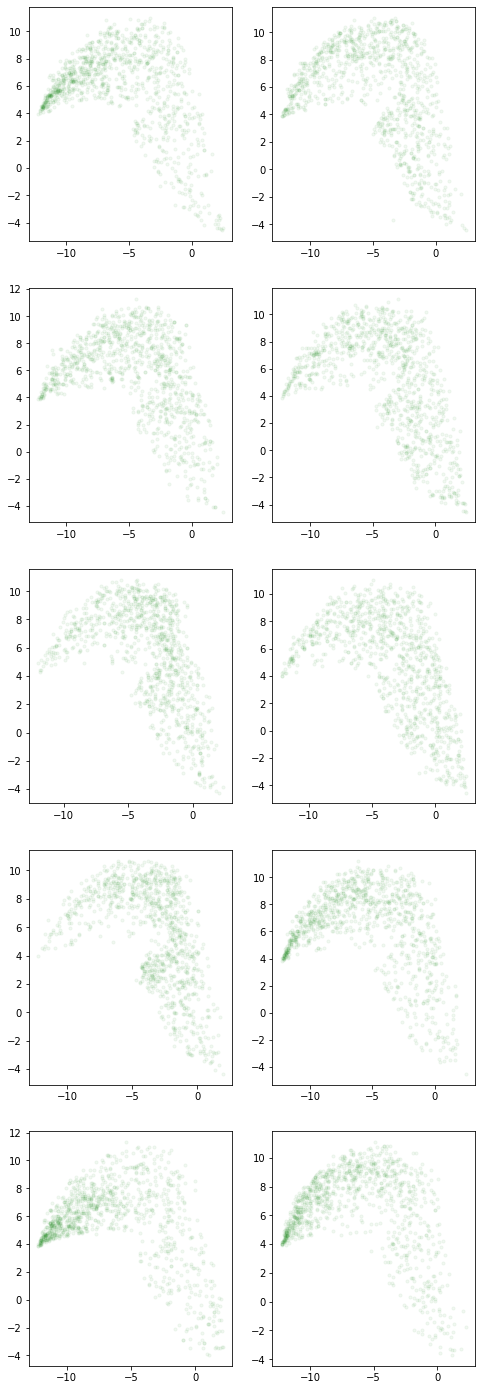

In [38]:
visualize(latent_all_cls)